**Cài đặt thư viện**

In [1]:
!pip install kaggle pandas numpy scikit-learn scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


**Kết nối Kaggle**

In [2]:
from google.colab import files
files.upload()  # Chọn file kaggle.json để upload


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anhvunam","key":"ac6d4395b25ce4063b2902a6ad5cd311"}'}

In [3]:
import os
!mkdir -p ~/.kaggle  # Tạo thư mục .kaggle
!mv kaggle.json ~/.kaggle/  # Di chuyển file vào thư mục
!chmod 600 ~/.kaggle/kaggle.json  # Cấp quyền truy cập

In [4]:
!kaggle datasets list

ref                                                               title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                 Chocolate Sales Data 📊🍫                                 14473  2025-03-19 03:51:40.270000          13567        238  1.0              
adilshamim8/student-depression-dataset                            Student Depression Dataset                             467020  2025-03-13 03:12:30.423000           5437         87  1.0              
abdulmalik1518/mobiles-dataset-2025                               Mobiles Dataset (2025)                                  20314  2025-02-18 06:50:24.370000          18710        308  1.0          

**Tải Dataset**

In [15]:
!kaggle datasets download -d simranjitkhehra/bank-transactions-dataset --unzip -p /content/dataset


Dataset URL: https://www.kaggle.com/datasets/simranjitkhehra/bank-transactions-dataset
License(s): MIT


In [14]:
!kaggle datasets list -s simranjitkhehra


ref                                                   title                                       size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------  ------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
simranjitkhehra/e-commerce-product-sales              E-Commerce Product Sales                  406642  2025-02-07 16:59:21.950000             72         34  0.5882353        
simranjitkhehra/e-commerce-sales-dataset              E-Commerce Sales Dataset                  156478  2025-02-07 16:46:42.610000            101         33  0.5882353        
simranjitkhehra/bank-transactions-dataset             Bank Transactions Dataset                3084034  2025-02-07 18:27:00.077000            119         33  0.5882353        
simranjitkhehra/movie-rating-review-dataset           Movie Rating Review Dataset                91544  2025-02-07 18:29

In [16]:
import os

# Liệt kê các file trong thư mục hiện tại
os.listdir('/content/dataset')


['bank_transactions.csv', 'Mall_Customers.csv']

**Đọc và rà soát data lỗi**

In [18]:
import pandas as pd

# Đọc file orders.csv
X = pd.read_csv("/content/dataset/bank_transactions.csv")

# Xem 5 dòng đầu tiên
print(X.head(10))

# Kiểm tra thông tin dữ liệu
print(X.info())


   Transaction ID  Account ID Transaction Type       Amount       Balance  \
0               1      470551       Withdrawal  8430.501880  48335.046394   
1               2      614234       Withdrawal  9966.065894  46077.196869   
2               3      987971       Withdrawal  7580.575275   3971.682791   
3               4      589505          Deposit  2443.760544  10726.779672   
4               5      183958       Withdrawal  3340.193456  14763.594374   
5               6      191584       Withdrawal   902.112024  27807.539342   
6               7      961602       Withdrawal  8285.690141  25661.761551   
7               8      754612       Withdrawal  6152.382380  41054.312241   
8               9      779948          Deposit  8178.559561  25723.718708   
9              10      675837          Deposit  9952.118229  37254.052417   

      Transaction Date  
0  2021-09-06 18:25:53  
1  2021-08-16 18:25:53  
2  2019-03-26 18:25:53  
3  2022-03-18 18:25:53  
4  2022-09-29 18:25:53  
5 

In [12]:
# Kiểm tra NaN
print("Số lượng NaN trong từng cột:")
print(X.isna().sum())

Số lượng NaN trong từng cột:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Dataset Instacart

In [ ]:
# Thay thế NaN bằng giá trị hợp lý
# X['days_since_prior_order'].fillna(X['days_since_prior_order'].median(), inplace=True)

<ipython-input-9-9c69659474c3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['days_since_prior_order'].fillna(orders['days_since_prior_order'].median(), inplace=True)


**Tính toán các chỉ số L R F M**


In [13]:
# Kiểm tra thông tin cột ngày tháng
print(X.head())
print(X.info())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# Xác định ngày mua đầu tiên và gần nhất của mỗi khách hàng
customer_orders = orders.groupby("user_id").agg(
    first_order=('order_number', 'min'),
    last_order=('order_number', 'max'),
    total_orders=('order_id', 'count')
).reset_index()

# Tính L và R dựa trên số lần mua hàng
customer_orders['L'] = customer_orders['last_order'] - customer_orders['first_order']
customer_orders['R'] = orders['order_number'].max() - customer_orders['last_order']


In [ ]:
# Tính F
customer_orders['F'] = customer_orders['total_orders']


In [ ]:
# Đọc dữ liệu sản phẩm trong đơn hàng
order_products = pd.read_csv("/content/dataset/order_products__train.csv")

# Gộp với dữ liệu đơn hàng để lấy user_id
order_products = order_products.merge(orders[['order_id', 'user_id']], on='order_id')

# Tính M: Tổng số sản phẩm đã mua
customer_monetary = order_products.groupby("user_id").agg(
    M=('order_id', 'count')
).reset_index()

# Gộp vào bảng LRFM
lrfm = customer_orders.merge(customer_monetary, on="user_id")

# Kiểm tra kết quả
print(lrfm.head(10))


   user_id  first_order  last_order  total_orders   L   R   F   M
0        1            1          11            11  10  89  11  11
1        2            1          15            15  14  85  15  31
2        5            1           5             5   4  95   5   9
3        7            1          21            21  20  79  21   9
4        8            1           4             4   3  96   4  18
5        9            1           4             4   3  96   4  22
6       10            1           6             6   5  94   6   4
7       13            1          13            13  12  87  13   5
8       14            1          14            14  13  86  14  11
9       17            1          41            41  40  59  41   6


**Kiểm tra dữ liệu trước khi huấn luyện**

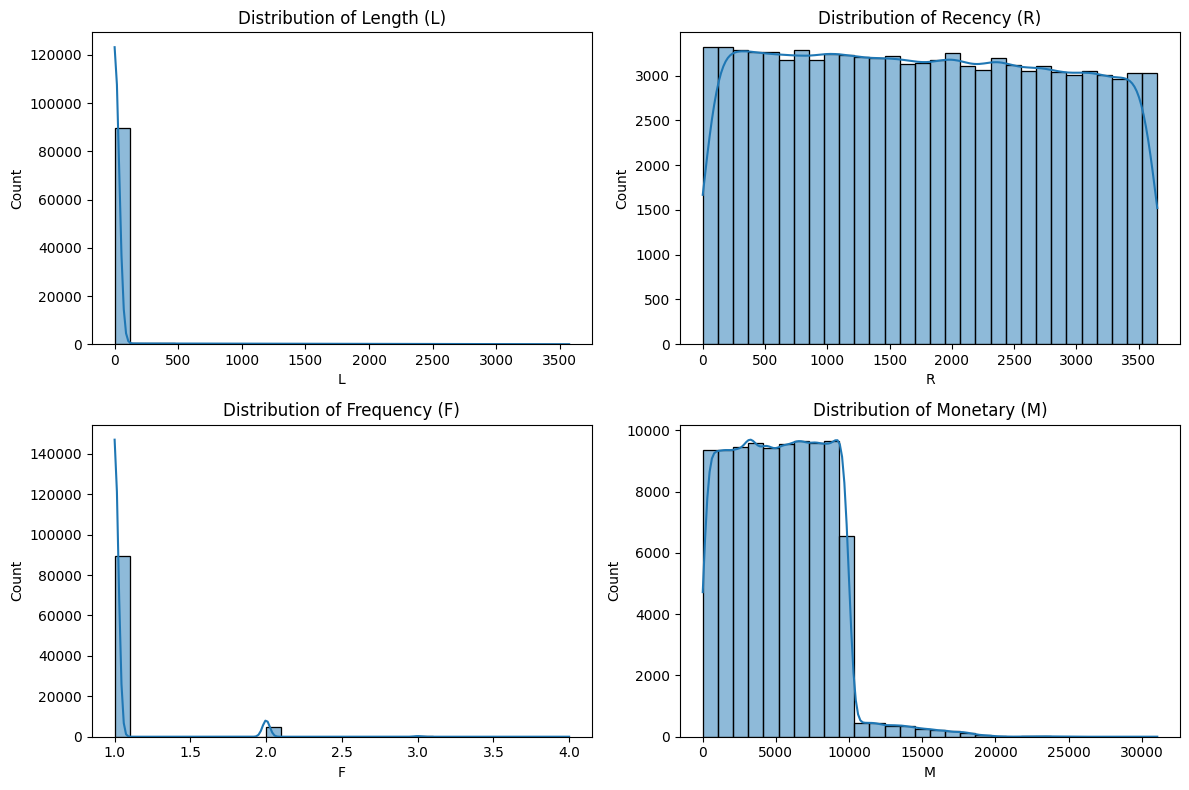

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ phân phối các chỉ số L, R, F, M
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(lrfm["L"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Length (L)")

sns.histplot(lrfm["R"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Recency (R)")

sns.histplot(lrfm["F"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Frequency (F)")

sns.histplot(lrfm["M"], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Monetary (M)")

plt.tight_layout()
plt.show()


**Bắt đầu phân cụm khách hàng với PFCM**

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


Chuẩn bị dữ liệu


In [ ]:
# Chuyển dữ liệu LRFM thành array
data = lrfm[["L", "R", "F", "M"]].values


Chạy thuật toán PFCM

In [38]:
# Xây dựng thuạt toán vì thư viện không hỗ trợ
import numpy as np

def initialize_membership(n, c):
    U = np.random.rand(c, n)
    U /= np.sum(U, axis=0)
    return U

def compute_centers(X, U, T, m, eta, a, b):
    numerator = (a * (U ** m) + b * (T ** eta)) @ X
    denominator = np.sum(a * (U ** m) + b * (T ** eta), axis=1, keepdims=True)
    return numerator / denominator

def update_membership(X, V, U, T, m, eta, a, b, delta):
    c, n = U.shape
    dist = np.zeros((c, n))
    for i in range(c):
        dist[i] = np.linalg.norm(X - V[i], axis=1) ** 2

    # Update membership U
    U_new = np.zeros((c, n))
    for i in range(c):
        denom = np.sum((dist[i] / dist) ** (1 / (m - 1)), axis=0)
        U_new[i] = 1 / denom

    # Update typicality T
    T_new = 1 / (1 + (dist / delta) ** (1 / (eta - 1)))

    return U_new, T_new

def pfcm(X, c, m=2, eta=2, a=1, b=1, delta=0.01, error=1e-5, max_iter=100):
    n = X.shape[0]
    U = initialize_membership(n, c)
    T = U.copy()
    V = compute_centers(X, U, T, m, eta, a, b)

    for _ in range(max_iter):
        U_new, T_new = update_membership(X, V, U, T, m, eta, a, b, delta)
        V_new = compute_centers(X, U_new, T_new, m, eta, a, b)

        if np.linalg.norm(V_new - V) < error:
            break

        U, T, V = U_new, T_new, V_new

    return V, U, T

# Example usage:
# X = np.array([[1, 2], [2, 3], [3, 4], [8, 9], [9, 10]])
# c = 2
# centers, U, T = pfcm(X, c)


In [ ]:
# Chạy thuật toán trên tập dữ liệu
# Chuẩn bị dữ liệu đầu vào cho thuật toán PFCM
# data = lrfm[['L', 'R', 'F', 'M']].values.T  # Chuyển vị để phù hợp với input của thuật toán

# Thiết lập số cụm
n_clusters = 10

# Chạy thuật toán PFCM
V, U, T = pfcm(data, n_clusters, m=2, eta=2, a=1, b=1, delta=0.01, error=1e-5, max_iter=100)


In [ ]:
# Lấy chỉ số cụm có membership cao nhất
cluster_labels = np.argmax(U, axis=0)

# Thêm cột 'cluster' vào DataFrame LRFM
lrfm['cluster'] = cluster_labels


In [ ]:
# Kiểm tra lại dữ liệu
print(f"U.shape: {U.shape}")  # U có số lượng mẫu bao nhiêu?
print(f"df_lrfm.shape: {lrfm.shape}")  # Số lượng khách hàng trong DataFrame
print(f"cluster_labels.shape: {cluster_labels.shape}")  # Kích thước của danh sách nhãn


U.shape: (10, 131209)
df_lrfm.shape: (131209, 9)
cluster_labels.shape: (131209,)


**Kiểm tra và phân tích kết quả**

In [ ]:
# Tính trung bình các chỉ số LRFM theo từng cụm
cluster_summary = lrfm.groupby('cluster').mean()

# Hiển thị kết quả
print(cluster_summary)


               user_id  first_order  last_order  total_orders          L  \
cluster                                                                    
0        102649.853395          1.0   12.095473     12.095473  11.095473   
1        104006.743237          1.0    5.788616      5.788616   4.788616   
2        101095.023576          1.0   68.970620     68.970620  67.970620   
3        103337.080402          1.0    6.190955      6.190955   5.190955   
4        102185.676903          1.0   50.431960     50.431960  49.431960   
5        103468.490244          1.0   95.274390     95.274390  94.274390   
6        103631.282609          1.0   36.892194     36.892194  35.892194   
7        102809.579691          1.0   18.471881     18.471881  17.471881   
8        102909.960784          1.0   26.456197     26.456197  25.456197   
9        102900.806366          1.0    8.856101      8.856101   7.856101   

                 R          F          M  
cluster                                   
0

**Trực quan hóa**

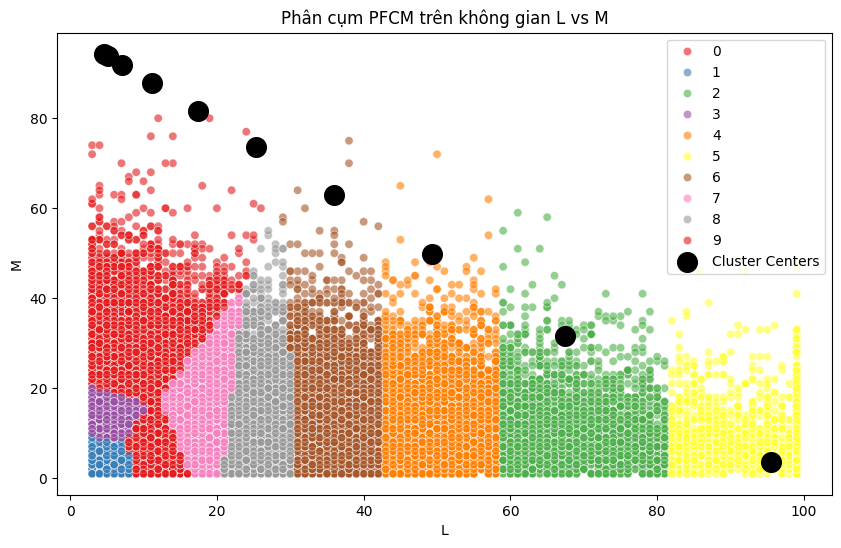

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn 2 đặc trưng để hiển thị
x_col = 'L'  # Chọn thuộc tính thứ nhất
y_col = 'M'  # Chọn thuộc tính thứ hai

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lrfm, x=x_col, y=y_col, hue='cluster', palette='Set1', alpha=0.6)
plt.scatter(V[:, 0], V[:, 1], color='black', marker='o', s=200, label='Cluster Centers')  # Tâm cụm
plt.title(f'Phân cụm PFCM trên không gian {x_col} vs {y_col}')
plt.legend()
plt.show()


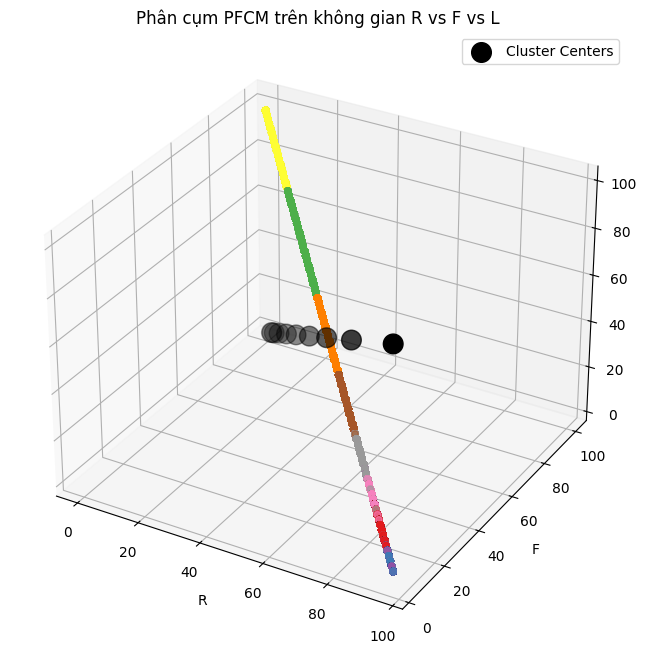

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import seaborn as sns

# Chọn 3 đặc trưng để hiển thị
x_col = 'R'  # Chọn thuộc tính thứ nhất
y_col = 'F'  # Chọn thuộc tính thứ hai
z_col = 'L'  # Chọn thuộc tính thứ ba

# Tạo figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter plot 3D
scatter = ax.scatter(lrfm[x_col],
                    lrfm[y_col],
                    lrfm[z_col],
                    c=lrfm['cluster'],
                    cmap='Set1',
                    alpha=0.6)

# Vẽ tâm cụm
ax.scatter(V[:, 0],
          V[:, 1],
          V[:, 2],
          color='black',
          marker='o',
          s=200,
          label='Cluster Centers')

# Thiết lập nhãn cho các trục
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)

# Tiêu đề và chú thích
plt.title(f'Phân cụm PFCM trên không gian {x_col} vs {y_col} vs {z_col}')
ax.legend()

plt.show()

**Đánh giá với các chỉ số**

In [ ]:
print("X.shape:", lrfm.shape)
print("V.shape:", V.shape)
print("U.shape:", U.shape)
print("lrfm:", lrfm.head())
print(V)

X.shape: (131209, 9)
V.shape: (10, 4)
U.shape: (10, 131209)
lrfm:    user_id  first_order  last_order  total_orders   L   R   F   M  cluster
0        1            1          11            11  10  89  11  11        0
1        2            1          15            15  14  85  15  31        9
2        5            1           5             5   4  95   5   9        3
3        7            1          21            21  20  79  21   9        7
4        8            1           4             4   3  96   4  18        3
[[ 5.12571834 93.87428166  6.12571834 13.30543494]
 [17.85255807 81.14744193 18.85255807  9.21407903]
 [68.12688698 30.87311302 69.12688698 10.20562676]
 [95.61376587  3.38623413 96.61376587  8.86418337]
 [36.89026706 62.10973294 37.89026706 10.20553493]
 [50.08353072 48.91646928 51.08353072 10.58426217]
 [ 7.52573034 91.47426966  8.52573034 24.78320038]
 [11.04761024 87.95238976 12.04761024  6.96625991]
 [ 4.64889846 94.35110154  5.64889846  4.63341544]
 [26.13969066 72.86030934

**PCI**

In [ ]:
def calculate_pci(U):
    """
    Tính toán Partition Coefficient Index (PCI) từ ma trận thành viên U.

    Parameters:
    U : list hoặc numpy array, shape (n, c)
        Ma trận thành viên, trong đó U[i][k] là giá trị thành viên của điểm i với cụm k.

    Returns:
    float: Giá trị PCI
    """
    n = len(U)  # Số lượng điểm dữ liệu
    pci_sum = 0

    # Tính tổng bình phương các giá trị thành viên
    for i in range(n):
        for k in range(len(U[i])):
            pci_sum += U[i][k] ** 2

    # Chia cho số lượng điểm dữ liệu
    pci = pci_sum / n
    return pci


def main():
    # Dữ liệu mẫu: Ma trận thành viên U với 3 điểm dữ liệu và 2 cụm
    # U = [
    #     [0.9, 0.1],
    #     [0.3, 0.7],
    #     [0.6, 0.4]
    # ]



    print(">>> calculate_pci(U)")
    # pci_value = calculate_pci(U)
    pci_value = calculate_pci(U.T.tolist())  # Chuyển về dạng (n, c)
    print(pci_value)


if __name__ == "__main__":
    main()

>>> calculate_pci(U)
0.5130664064034341


**FHV**

In [ ]:
print(type(lrfm))

<class 'pandas.core.frame.DataFrame'>


In [61]:
import numpy as np


def calculate_fhv(U, X, V, m=2):
    """
    Tính toán Fuzzy Hypervolume (FHV) từ ma trận thành viên U, dữ liệu X và tâm cụm V.

    Parameters:
    U : numpy array, shape (n, c)
        Ma trận thành viên, U[i,k] là giá trị thành viên của điểm i với cụm k.
    X : numpy array, shape (n, d)
        Tập hợp điểm dữ liệu, n là số điểm, d là số chiều.
    V : numpy array, shape (c, d)
        Tâm của các cụm, c là số cụm.
    m : float
        Hệ số mờ (mặc định là 2).

    Returns:
    float: Giá trị FHV
    """
    n, c = U.shape  # Số điểm dữ liệu và số cụm
    d = X.shape[1]  # Số chiều của dữ liệu
    fhv = 0

    for k in range(c):
        # Tính tử số: Ma trận hiệp phương sai mờ F_k
        numerator = np.zeros((d, d))
        denominator = 0

        for i in range(n):
            u_ik_m = U[i, k] ** m
            diff = X[i] - V[k]  # Vector chênh lệch (x_i - v_k)
            numerator += u_ik_m * np.outer(diff, diff)  # (x_i - v_k)(x_i - v_k)^T
            denominator += u_ik_m

        F_k = numerator / denominator  # Ma trận hiệp phương sai mờ

        # Tính căn bậc hai của định thức
        fhv += np.sqrt(np.linalg.det(F_k))

    return fhv


def main():
    # Dữ liệu mẫu
    # U = np.array([[0.9, 0.1],  # Ma trận thành viên
    #               [0.3, 0.7],
    #               [0.6, 0.4]])
    # X = np.array([[1, 2],  # Dữ liệu 2D (3 điểm, 2 chiều)
    #               [2, 3],
    #               [3, 1]])
    # V = np.array([[1.5, 2],  # Tâm của 2 cụm
    #               [2.5, 2]])

    # Tính FHV
    # lrfm = lrfm.to_numpy()
    print(">>> calculate_fhv(U, X, V, m=2)")
    fhv_value = calculate_fhv(U, lrfm, V, m=2)
    print(fhv_value)


if __name__ == "__main__":
    main()

>>> calculate_fhv(U, X, V, m=2)


KeyError: 0

**XBI**

In [60]:

def calculate_xbi(U, X, V, m=2):
    """
    Tính toán Xie-Beni Index (XBI) từ ma trận thành viên U, dữ liệu X và tâm cụm V.

    Parameters:
    U : numpy array, shape (n, c)
        Ma trận thành viên, U[i,k] là giá trị thành viên của điểm i với cụm k.
    X : numpy array, shape (n, d)
        Tập hợp điểm dữ liệu, n là số điểm, d là số chiều.
    V : numpy array, shape (c, d)
        Tâm của các cụm, c là số cụm.
    m : float
        Hệ số mờ (mặc định là 2).

    Returns:
    float: Giá trị XBI
    """
    n, c = U.shape  # Số điểm dữ liệu và số cụm

    # Tính tử số: Tổng bình phương khoảng cách có trọng số
    numerator = 0
    for i in range(n):
        for k in range(c):
            diff = X[i] - V[k]  # Vector chênh lệch (x_i - v_k)
            dist_squared = np.sum(diff ** 2)  # Bình phương khoảng cách Euclid
            numerator += (U[i, k] ** m) * dist_squared

    # Tính mẫu số: Khoảng cách nhỏ nhất giữa các tâm cụm
    min_dist_squared = float('inf')
    for k in range(c):
        for l in range(k + 1, c):
            diff = V[k] - V[l]
            dist_squared = np.sum(diff ** 2)
            min_dist_squared = min(min_dist_squared, dist_squared)

    # Tính XBI
    xbi = numerator / (n * min_dist_squared)
    return xbi


def main():
    # Dữ liệu mẫu
    # U = np.array([[0.9, 0.1],  # Ma trận thành viên
    #               [0.3, 0.7],
    #               [0.6, 0.4]])
    # X = np.array([[1, 2],  # Dữ liệu 2D (3 điểm, 2 chiều)
    #               [2, 3],
    #               [3, 1]])
    # V = np.array([[1.5, 2],  # Tâm của 2 cụm
    #               [2.5, 2]])

    # Tính XBI
    print(">>> calculate_xbi(U, X, V, m=2)")
    xbi_value = calculate_xbi(U, X, V, m=2)
    print(xbi_value)


if __name__ == "__main__":
    main()

>>> calculate_xbi(U, X, V, m=2)


IndexError: index 5 is out of bounds for axis 0 with size 5

# Dataset Bank Transactions


**Chuyển cột ngày giao dịch thành dạng datetime **

In [23]:
X['Transaction Date'] = pd.to_datetime(X['Transaction Date'])


**Tính toán các chỉ số LRFM**

In [33]:
reference_date = X['Transaction Date'].max()

lrfm = X.groupby('Account ID', sort= False).agg(
    L=('Transaction Date', lambda x: (x.max() - x.min()).days),  # Length: Khoảng thời gian từ giao dịch đầu đến cuối
    R=('Transaction Date', lambda x: (reference_date - x.max()).days),  # Recency: Số ngày từ lần giao dịch cuối
    F=('Transaction Date', 'count'),  # Frequency: Số lần giao dịch
    M=('Amount', 'sum')  # Monetary: Tổng số tiền chi tiêu
).reset_index()


In [34]:
lrfm.head(10)

,Account ID,L,R,F,M
0,470551,0,1249,1,8430.501880
1,614234,0,1270,1,9966.065894
2,987971,0,2144,1,7580.575275
3,589505,0,1056,1,2443.760544
4,183958,0,861,1,3340.193456
5,191584,0,2585,1,902.112024
6,961602,0,1066,1,8285.690141
7,754612,0,1851,1,6152.382380
8,779948,0,2239,1,8178.559561
9,675837,0,1732,1,9952.118229


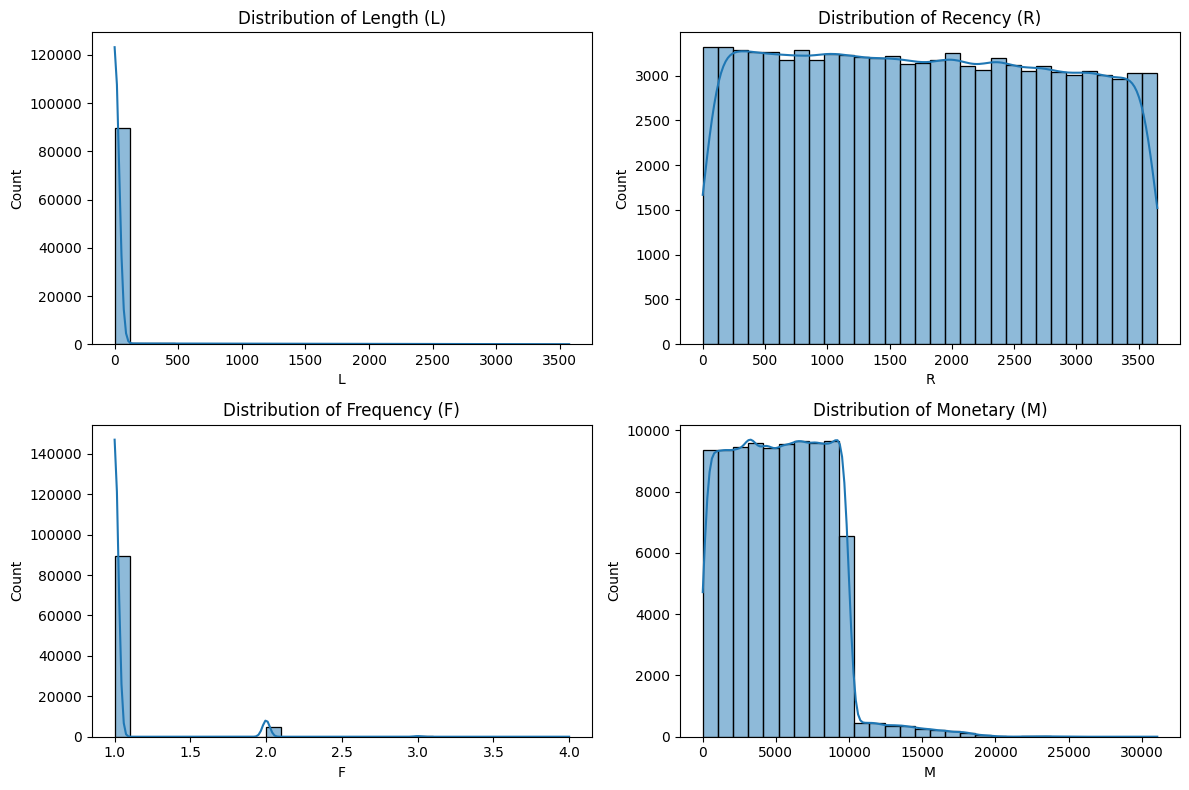

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ phân phối các chỉ số L, R, F, M
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(lrfm["L"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Length (L)")

sns.histplot(lrfm["R"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Recency (R)")

sns.histplot(lrfm["F"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Frequency (F)")

sns.histplot(lrfm["M"], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Monetary (M)")

plt.tight_layout()
plt.show()


In [37]:
# Chuyển dữ liệu LRFM thành array
X = lrfm[["L", "R", "F", "M"]].values


In [44]:
# Chạy thuật toán trên tập dữ liệu
# Chuẩn bị dữ liệu đầu vào cho thuật toán PFCM
# data = lrfm[['L', 'R', 'F', 'M']].values.T  # Chuyển vị để phù hợp với input của thuật toán

# Thiết lập số cụm
n_clusters = 5

# Chạy thuật toán PFCM
V, U, T = pfcm(X, n_clusters, m=2, eta=2, a=1, b=1, delta=0.01, error=1e-5, max_iter=100)


In [45]:
# Lấy chỉ số cụm có membership cao nhất
cluster_labels = np.argmax(U, axis=0)

# Thêm cột 'cluster' vào DataFrame LRFM
lrfm['cluster'] = cluster_labels


In [46]:
# Kiểm tra lại dữ liệu
print(f"U.shape: {U.shape}")  # U có số lượng mẫu bao nhiêu?
print(f"df_lrfm.shape: {lrfm.shape}")  # Số lượng khách hàng trong DataFrame
print(f"cluster_labels.shape: {cluster_labels.shape}")  # Kích thước của danh sách nhãn


U.shape: (5, 94654)
df_lrfm.shape: (94654, 6)
cluster_labels.shape: (94654,)


In [47]:
# Tính trung bình các chỉ số LRFM theo từng cụm
cluster_summary = lrfm.groupby('cluster').mean()

# Hiển thị kết quả
print(cluster_summary)


            Account ID           L            R         F            M
cluster                                                               
0        547188.281966    7.040658  1796.783473  1.005889  1182.928191
1        550008.954893   15.441014  2702.087735  1.028041  8459.980746
2        550828.896196   22.680888  1881.578261  1.019746  3555.217341
3        552499.473295  315.734428   912.572576  1.252396  9711.383415
4        550752.231397   41.674134  1692.793002  1.035035  6016.393580


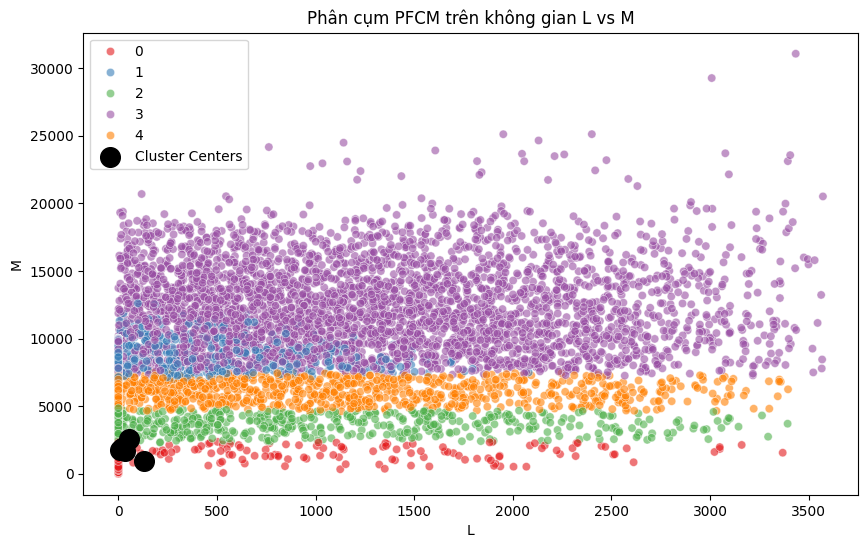

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn 2 đặc trưng để hiển thị
x_col = 'L'  # Chọn thuộc tính thứ nhất
y_col = 'M'  # Chọn thuộc tính thứ hai

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lrfm, x=x_col, y=y_col, hue='cluster', palette='Set1', alpha=0.6)
plt.scatter(V[:, 0], V[:, 1], color='black', marker='o', s=200, label='Cluster Centers')  # Tâm cụm
plt.title(f'Phân cụm PFCM trên không gian {x_col} vs {y_col}')
plt.legend()
plt.show()


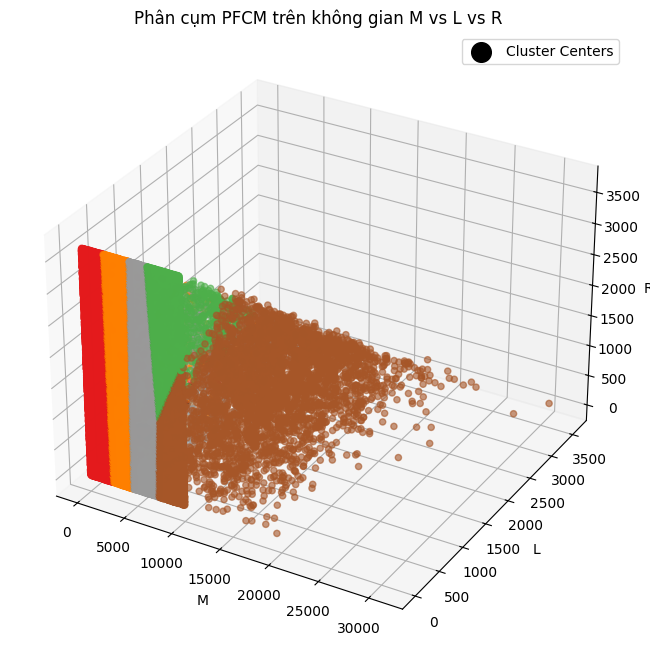

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import seaborn as sns

# Chọn 3 đặc trưng để hiển thị
x_col = 'M'  # Chọn thuộc tính thứ nhất
y_col = 'L'  # Chọn thuộc tính thứ hai
z_col = 'R'  # Chọn thuộc tính thứ ba

# Tạo figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter plot 3D
scatter = ax.scatter(lrfm[x_col],
                    lrfm[y_col],
                    lrfm[z_col],
                    c=lrfm['cluster'],
                    cmap='Set1',
                    alpha=0.6)

# Vẽ tâm cụm
ax.scatter(V[:, 0],
          V[:, 1],
          V[:, 2],
          color='black',
          marker='o',
          s=200,
          label='Cluster Centers')

# Thiết lập nhãn cho các trục
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)

# Tiêu đề và chú thích
plt.title(f'Phân cụm PFCM trên không gian {x_col} vs {y_col} vs {z_col}')
ax.legend()

plt.show()

In [58]:
def calculate_pci(U):
    """
    Tính toán Partition Coefficient Index (PCI) từ ma trận thành viên U.

    Parameters:
    U : list hoặc numpy array, shape (n, c)
        Ma trận thành viên, trong đó U[i][k] là giá trị thành viên của điểm i với cụm k.

    Returns:
    float: Giá trị PCI
    """
    n = len(U)  # Số lượng điểm dữ liệu
    pci_sum = 0

    # Tính tổng bình phương các giá trị thành viên
    for i in range(n):
        for k in range(len(U[i])):
            pci_sum += U[i][k] ** 2

    # Chia cho số lượng điểm dữ liệu
    pci = pci_sum / n
    return pci


def main():
    # Dữ liệu mẫu: Ma trận thành viên U với 3 điểm dữ liệu và 2 cụm
    # U = [
    #     [0.9, 0.1],
    #     [0.3, 0.7],
    #     [0.6, 0.4]
    # ]



    print(">>> calculate_pci(U)")
    # pci_value = calculate_pci(U)
    pci_value = calculate_pci(U.T.tolist())  # Chuyển về dạng (n, c)
    print(pci_value)


if __name__ == "__main__":
    main()

>>> calculate_pci(U)
0.5403286525210267
